<h1><center>Volcanoes On Venus<center></h1>

---

#### Welcome to the __Modeling__ section of the project.

---

<img src="volcano_rgb.jpg" width=800 height=450>

---

This is my favorite section of the project. In this section we will get our hands dirty by building and implementing Machine Learning models and tweak their hyper parameters. This section is like a car garage at our home.
<br><br>

We will build and implement:
- Logistic Regression
- Shallow Neural Network
- Deep Neural Network

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

### Importing the Dataset

In [2]:
df = pd.read_csv("/Users/Manoj/GitHub/venusvolcanoes.csv")

In [3]:
X_train = df[df["trn_tst"] == "train"].drop(columns = ["Volcano", "trn_tst"])
X_test = df[df["trn_tst"] == "test"].drop(columns = ["Volcano", "trn_tst"])
y_train = df[df["trn_tst"] == "train"]["Volcano"]
y_test = df[df["trn_tst"] == "test"]["Volcano"]

#### Data

In [4]:
print("Number of Input Examples:", X_train.shape[0])
print("Number of Input Features:", X_train.shape[1], '\n')
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Number of Input Examples: 6747
Number of Input Features: 12100 

X_train shape: (6747, 12100)
y_train shape: (6747,)
X_test shape: (2631, 12100)
y_test shape: (2631,)


#### Input Dataset

In [5]:
X_train.head()

0    1    2    3   4    5    6    7    8    9  ...  12090  12091  12092  \
0   95  101   99  103  95   86   96   89   70  104  ...    111    107     92   
1   91   92   91   89  92   93   96  101  107  104  ...    103     92     93   
2   87   70   72   74  84   78   93  104  106  106  ...     84     71     95   
3  114  118  124  119  95  118  105  116  123  112  ...    116    113    102   
4   79   95   90   82  73   74   77   75   82   87  ...     90     80     79   

   12093  12094  12095  12096  12097  12098  12099  
0     89    103     99    117    116    118     96  
1     95     98    105    104    100     90     81  
2    102     94     80     91     80     84     90  
3     93    109    104    106    117    111    115  
4     78     65     71     62     97     89     73  

[5 rows x 12100 columns]

#### Input Samples

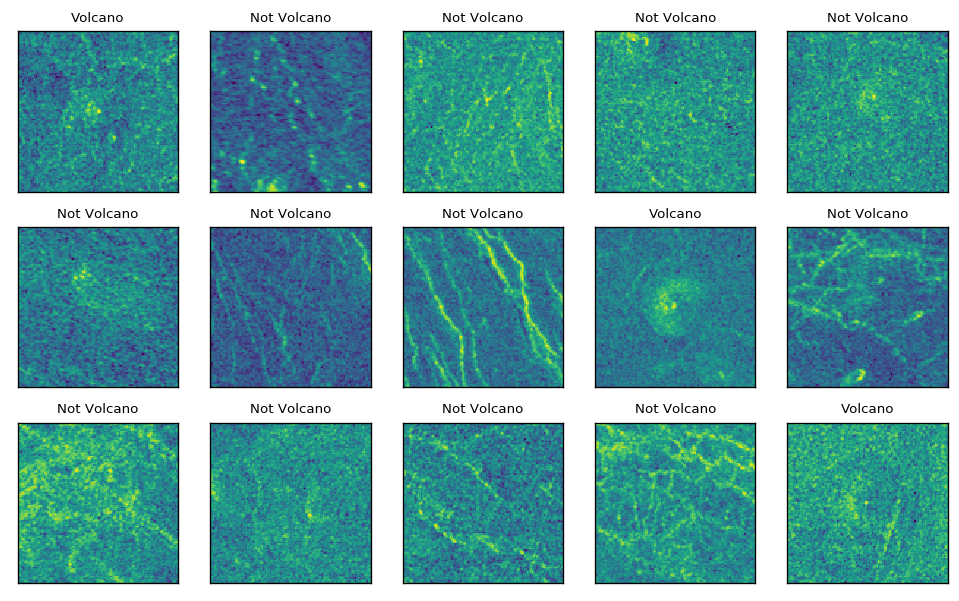

In [6]:
plt.style.use('default') 
plt.figure(figsize = (10, 6), dpi = 120)

for i in range(0, 15):
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(X_train.iloc[i]).reshape(110, 110))
    plt.title("Volcano" if y_train[i] == 1 else "Not Volcano", fontsize = 8)

#### Target Classes Distribution

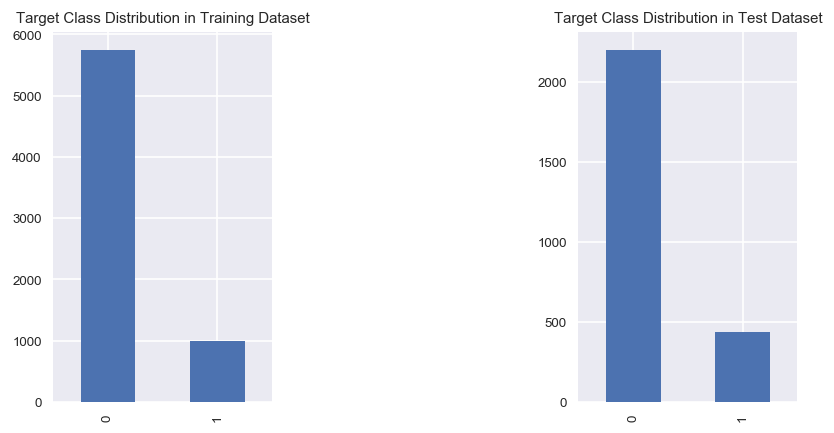

In [7]:
plt.style.use('seaborn') 
plt.figure(figsize = (8, 4), dpi = 120)

subplot(1, 3, 1)
y_train.value_counts().plot.bar()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Target Class Distribution in Training Dataset", fontsize = 9)

subplot(1, 3, 3)
y_test.value_counts().plot.bar()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Target Class Distribution in Test Dataset", fontsize = 9)

plt.show()

### Data Preparation

- We have 6747 training samples and 2631 test samples. Let's grow our training set by stealing some few samples from the test set. 

- Also, let's create a cross validation set by splitting the training set equally. 

- Let's make these splits so that we will have ~500 samples in cross validation set and ~500 in test set.

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test, y_test, test_size = 0.4, random_state = 42)

X_train = X_train.append(X_train2, ignore_index=True)
y_train = y_train.append(y_train2, ignore_index=True)

In [9]:
X_test, X_val, y_test, y_val = train_test_split(X_test2, y_test2, test_size = 0.5, random_state = 42)

In [10]:
del([X_train2, X_test2, y_train2, y_test2])

print("Training Samples:", X_train.shape[0])
print("Validation Samples:", X_val.shape[0])
print("Test Samples:", X_test.shape[0])

Training Samples: 8325
Validation Samples: 527
Test Samples: 526


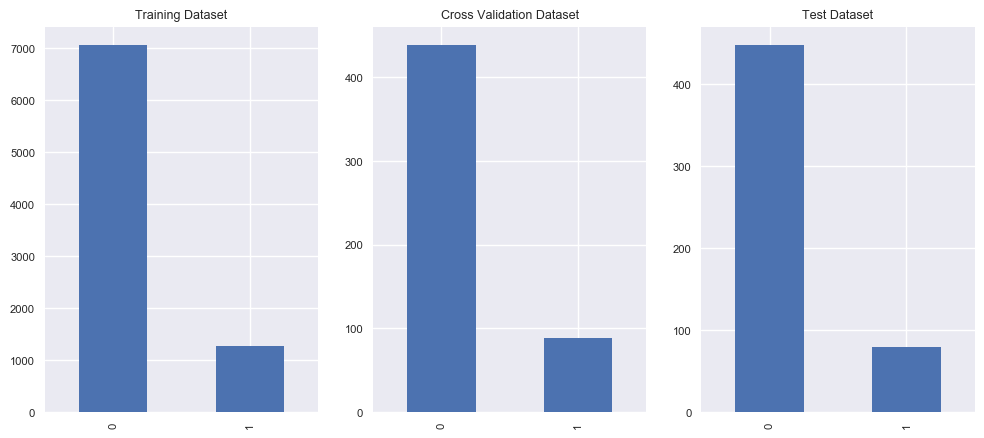

In [11]:
plt.style.use('seaborn') 
plt.figure(figsize = (12, 5), dpi = 100)

subplot(1, 3, 1)
y_train.value_counts().plot.bar()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Training Dataset", fontsize = 9)

subplot(1, 3, 2)
y_val.value_counts().plot.bar()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Cross Validation Dataset", fontsize = 9)

subplot(1, 3, 3)
y_test.value_counts().plot.bar()
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Test Dataset", fontsize = 9)

plt.show()

In [14]:
X_train = np.array(X_train).T
X_test = np.array(X_test).T
X_val = np.array(X_val).T

In [15]:
y_train = np.array(y_train).T
y_test = np.array(y_test).T
y_val = np.array(y_val).T

---

### Logistic Regression

---

In [14]:
def sigmoid(z):
    A = 1.0/(1.0 + np.exp(-z))
    return A

In [15]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [16]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1.0/m) * np.sum(np.multiply(Y, np.log(A)) + np.multiply((1-Y), np.log(1 - A)))
    
    dw = (1.0/m) * np.dot(X, (A - Y).T)
    db = (1.0/m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(isinstance(db, float) or isinstance(db, int))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
            "db": db}
    
    return grads, cost

In [17]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        if i%100 == 0:
            costs.append(cost)
            
        if print_cost and ((i%500 == 0) or (i == num_iterations-1)):
            print("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [18]:
def predict(w, b, X, threshold):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    Y_prediction[A <= threshold] = 0
    Y_prediction[A > threshold] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [19]:
def logit_model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, threshold = 0.5, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test, threshold)
    Y_prediction_train = predict(w, b, X_train, threshold)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [27]:
def cm_evaluator(y_actual, y_predicted):
    cm = confusion_matrix(y_actual, y_predicted)

    TN = cm[0, 0]
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    
    return TP, TN, FP, FN, accuracy, precision, recall

### Trial 1

- num_iterations = 2500
- learning_rate = 0.01

---

In [ ]:
d = logit_model(X_train, y_train, X_val, y_val, num_iterations = 2500, learning_rate = 0.01, threshold = 0.5, print_cost = False)

__Encountered the following warnings:__

- RuntimeWarning: overflow encountered in exp
  
- RuntimeWarning: divide by zero encountered in log
  
- RuntimeWarning: invalid value encountered in multiply
<br>

Kernel doomed. Performed keyboard Interrupt. 
<br><br>

Upon debugging, I found that during second iteration, the values of Z are 
```
array([[-430640.67585826, -409986.54837357, -392480.54755315, ..., -522971.7373994 , -413872.07898378]])

```

A quick google search on the warning returned a stack overflow response: 

_The largest value representable by a numpy float is 1.7976931348623157e+308, whose logarithm is about 709.782, so there is no way to represent np.exp(1234.1)_
<br><br>

__Possible Solutions:__
 - Use data type `np.float128`, however this is computationally expensive.
 - Normalization
 <br><br>
 
Let us try Normalization and see if it helps.

---

#### Normalization

- It is a good practice to normalize data before feeding it to the learning algorithm. 

- Algorithms like gradient decent will converge faster if we normalize/standardize the input data.

In [23]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

__Normalized Inputs__

In [24]:
pd.DataFrame(X_train.T).head()

0         1         2         3         4         5         6      \
0  0.372549  0.396078  0.388235  0.403922  0.372549  0.337255  0.376471   
1  0.356863  0.360784  0.356863  0.349020  0.360784  0.364706  0.376471   
2  0.341176  0.274510  0.282353  0.290196  0.329412  0.305882  0.364706   
3  0.447059  0.462745  0.486275  0.466667  0.372549  0.462745  0.411765   
4  0.309804  0.372549  0.352941  0.321569  0.286275  0.290196  0.301961   

      7         8         9      ...     12090     12091     12092     12093  \
0  0.349020  0.274510  0.407843  ...  0.435294  0.419608  0.360784  0.349020   
1  0.396078  0.419608  0.407843  ...  0.403922  0.360784  0.364706  0.372549   
2  0.407843  0.415686  0.415686  ...  0.329412  0.278431  0.372549  0.400000   
3  0.454902  0.482353  0.439216  ...  0.454902  0.443137  0.400000  0.364706   
4  0.294118  0.321569  0.341176  ...  0.352941  0.313725  0.309804  0.305882   

      12094     12095     12096     12097     12098     12099  
0  0.403922  0.388235  0.458824  0.454902  0.462745  0.376471  
1  0.384314  0.411765  0.407843  0.392157  0.352941  0.317647  
2  0.368627  0.313725  0.356863  0.313725  0.329412  0.352941  
3  0.427451  0.407843  0.415686  0.458824  0.435294  0.450980  
4  0.254902  0.278431  0.243137  0.380392  0.349020  0.286275  

[5 rows x 12100 columns]

---

### Trial 2

- Normalize Inputs
- num_iterations = 2500
- learning_rate = 0.01

In [248]:
d = logit_model(X_train, y_train, X_val, y_val, num_iterations = 2500, learning_rate = 0.01, threshold = 0.5, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.472896
Cost after iteration 1000: 0.431054
Cost after iteration 1500: 0.394265
Cost after iteration 2000: 0.361496
Cost after iteration 2499: 0.313286
train accuracy: 85.52552552552552 %
test accuracy: 83.87096774193549 %


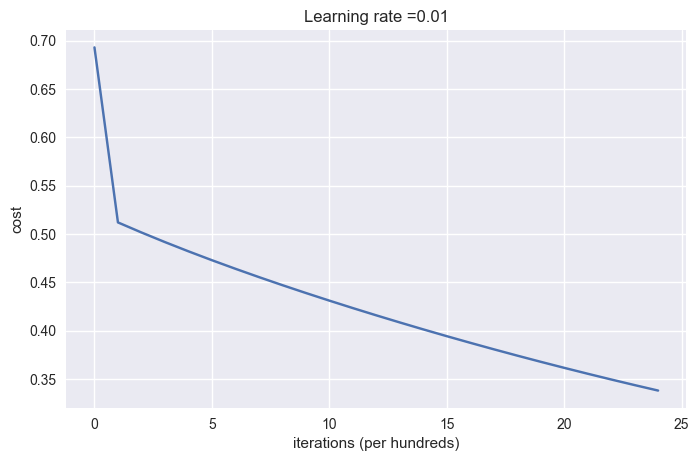

In [249]:
plt.style.use('seaborn') 
plt.figure(figsize = (8, 5), dpi = 100)

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

After 2500 iterations with a learning rate of 0.01, we obtained
- Train accuracy = 85.52%
- Test accuracy = 83.87%

However, we defined these accuracy metrics as the mean error in predictions. Let's explore more robust metrics to evaluate our model performance.

While looking for other ways to evaluate the model, I found this article [Metrics to Evaluate your Machine Learning Algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234) on Medium.
<br><br>

__Classification Accuracy__
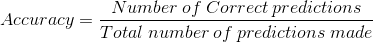
<br>
- Ratio of number of correct predictions to the total number of input samples.
- It works well only if there are equal number of samples belonging to each class.
- Classification Accuracy is what we computed earlier to evaluate our model. As we have a huge class imbalance in output, Classification Accuracy is not a best evaluation metric.
- As majority of the classes are Non-Volcanoes in our dataset, we can get high classification accuracy just by using predicting everything as Non-Volcano. I obtained a Classification Accuracy of 83% (same as our model) just by using matrix full of zeros.

```
100 - np.mean(np.abs(np.zeros(shape = y_val.shape) - y_val)) * 100
```



__Confusion Matrix__

- _True Positives_ : The cases in which we predicted YES and the actual output was also YES.
- _True Negatives_ : The cases in which we predicted NO and the actual output was NO.
- _False Positives_ : The cases in which we predicted YES and the actual output was NO.
- _False Negatives_ : The cases in which we predicted NO and the actual output was YES.
<br><br>

From Confusion Matrix, we can define the following metrices:

$$Accuracy = (True Positives + True Negatives) / Total Number of Samples$$

$$Precision = True Positives / (True Positives + False Positives)$$

$$Recall = True Positives / (True Positives + False Negatives)$$
<br>
In Trial 2, we have

In [318]:
TP, TN, FP, FN, accuracy, precision, recall = cm_evaluator(y_val, d["Y_prediction_test"].T)

In [319]:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 4
True Negatives: 438
False Positives: 0
False Negatives: 85


In [325]:
print("Trial 2 Accuracy = ", round(100 * accuracy, 2), "%")
print("Trial 2 Precision = ", round(100 * precision, 2), "%")
print("Trial 2 Recall = ", round(100 * recall, 2), "%")

Trial 2 Accuracy =  83.87 %
Trial 2 Precision =  100.0 %
Trial 2 Recall =  4.49 %


---

### Summary

---

The training set accuracy is very low at 85.52%. Our algorithm is suffering from __High Bias__ problem.

We can try:
- Decrease Regularization (we are not using regularization yet)
- Try Adding Additional Features
- Adding polynomial terms
<br><br>

The Recall of our algorithm is very low.

We can try:
- Reduce Threshold
- Vary Learning Rate
- Error Analysis

---

### Trial 3

- Normalize Inputs
- num_iterations = 2500
- learning_rate = 0.05


In [326]:
d = logit_model(X_train, y_train, X_val, y_val, num_iterations = 2500, learning_rate = 0.05, threshold = 0.5, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.364389
Cost after iteration 1000: 1.827769
Cost after iteration 1500: 2.669341
Cost after iteration 2000: 1.692479
Cost after iteration 2499: 1.607913
train accuracy: 88.36036036036036 %
test accuracy: 90.70208728652752 %


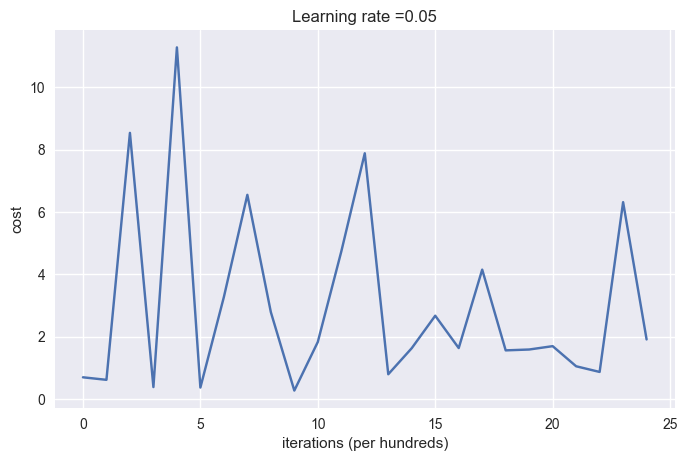

In [327]:
plt.style.use('seaborn') 
plt.figure(figsize = (8, 5), dpi = 100)

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [328]:
TP, TN, FP, FN, accuracy, precision, recall = cm_evaluator(y_val, d["Y_prediction_test"].T)
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 71
True Negatives: 407
False Positives: 31
False Negatives: 18


In [329]:
print("Trial 3 Accuracy = ", round(100 * accuracy, 2), "%")
print("Trial 3 Precision = ", round(100 * precision, 2), "%")
print("Trial 3 Recall = ", round(100 * recall, 2), "%")

Trial 2 Accuracy =  90.7 %
Trial 2 Precision =  69.61 %
Trial 2 Recall =  79.78 %


---

### Summary

---

Oh boy!

---

### Diagnostics 1 - Reduce Threshold

In [333]:
d = logit_model(X_train, y_train, X_val, y_val, num_iterations = 2500, learning_rate = 0.01, threshold = 0.3, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 500: 0.472896
Cost after iteration 1000: 0.431054
Cost after iteration 1500: 0.394265
Cost after iteration 2000: 0.361496
Cost after iteration 2499: 0.313286
train accuracy: 87.63963963963964 %
test accuracy: 86.33776091081594 %


In [336]:
TP, TN, FP, FN, accuracy, precision, recall = cm_evaluator(y_val, d["Y_prediction_test"].T)
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("Accuracy = ", round(100 * accuracy, 2), "%")
print("Precision = ", round(100 * precision, 2), "%")
print("Recall = ", round(100 * recall, 2), "%")

True Positives: 18
True Negatives: 437
False Positives: 1
False Negatives: 71
Accuracy =  86.34 %
Precision =  94.74 %
Recall =  20.22 %


In [337]:
TP, TN, FP, FN, accuracy, precision, recall = cm_evaluator(y_train, d["Y_prediction_train"].T)
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("Accuracy = ", round(100 * accuracy, 2), "%")
print("Precision = ", round(100 * precision, 2), "%")
print("Recall = ", round(100 * recall, 2), "%")

True Positives: 254
True Negatives: 7042
False Positives: 17
False Negatives: 1012
Accuracy =  87.64 %
Precision =  93.73 %
Recall =  20.06 %


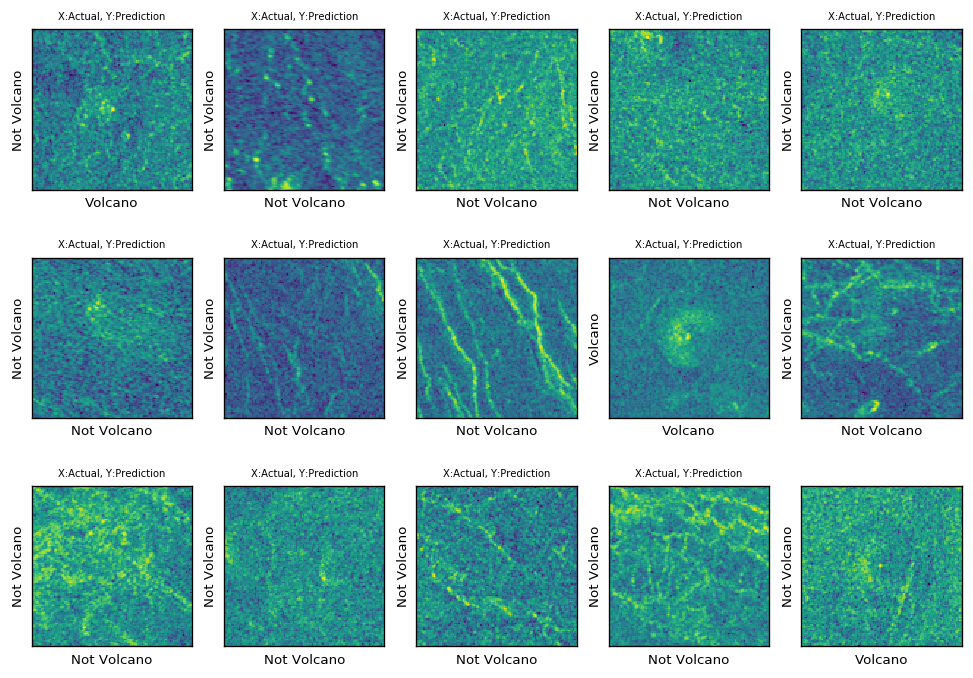

In [392]:
plt.style.use('default') 
plt.figure(figsize = (10, 7), dpi = 120)


for i in range(0, 15):
    plt.title("X:Actual, Y:Prediction", fontsize = 6)
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(pd.DataFrame(X_train.T).iloc[i]).reshape(110, 110))
    plt.xlabel("Volcano" if pd.Series(y_train.T)[i] == 1 else "Not Volcano", fontsize = 8)
    plt.ylabel("Volcano" if pd.Series(d['Y_prediction_train'].T[:, 0])[i] == 1 else "Not Volcano", fontsize = 8)

In [407]:
comp_df = pd.concat([pd.Series(y_train.T, name = "Actual"), pd.Series(d['Y_prediction_train'].T[:, 0], dtype = int, name = "Prediction")], axis = 1, )

In [423]:
comp_df[(comp_df["Actual"] != comp_df["Prediction"]) & (comp_df["Actual"] == 0)].index[0:15]

Int64Index([ 702, 1358, 1495, 2106, 2515, 2859, 4704, 4812, 5117, 5443, 6557,
            6962, 7285, 7390, 7867],
           dtype='int64')

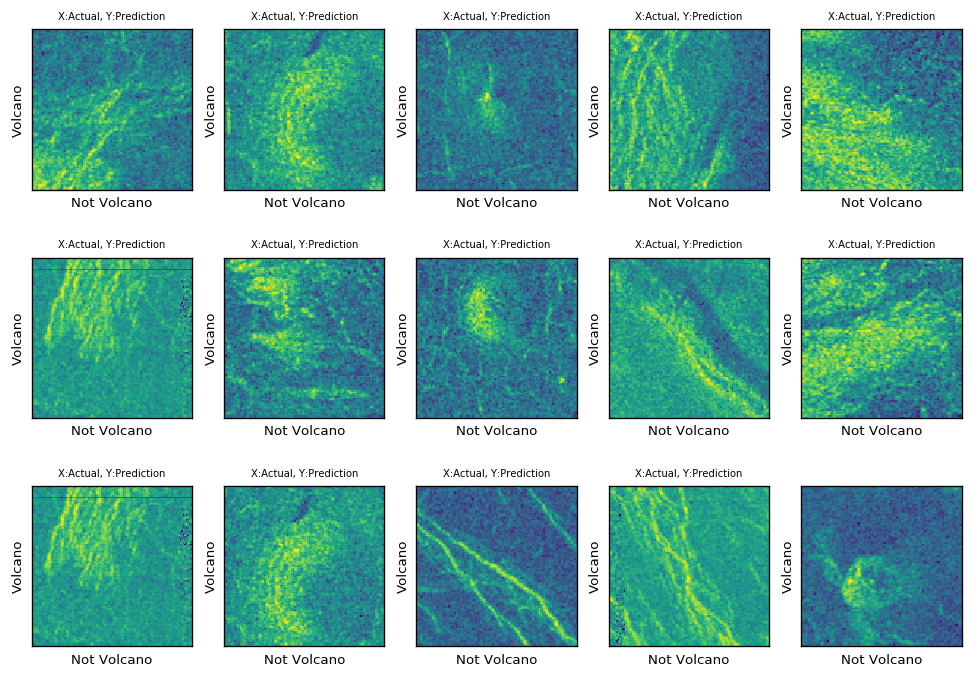

In [425]:
#comp_df[(comp_df["Actual"] != comp_df["Prediction"]) & (comp_df["Actual"] == 0)].index

plt.style.use('default') 
plt.figure(figsize = (10, 7), dpi = 120)


for i,j in enumerate(comp_df[(comp_df["Actual"] != comp_df["Prediction"]) & (comp_df["Actual"] == 0)].index[0:15]):
    plt.title("X:Actual, Y:Prediction", fontsize = 6)
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(pd.DataFrame(X_train.T).iloc[j]).reshape(110, 110))
    plt.xlabel("Volcano" if pd.Series(y_train.T)[j] == 1 else "Not Volcano", fontsize = 8)
    plt.ylabel("Volcano" if pd.Series(d['Y_prediction_train'].T[:, 0])[j] == 1 else "Not Volcano", fontsize = 8)

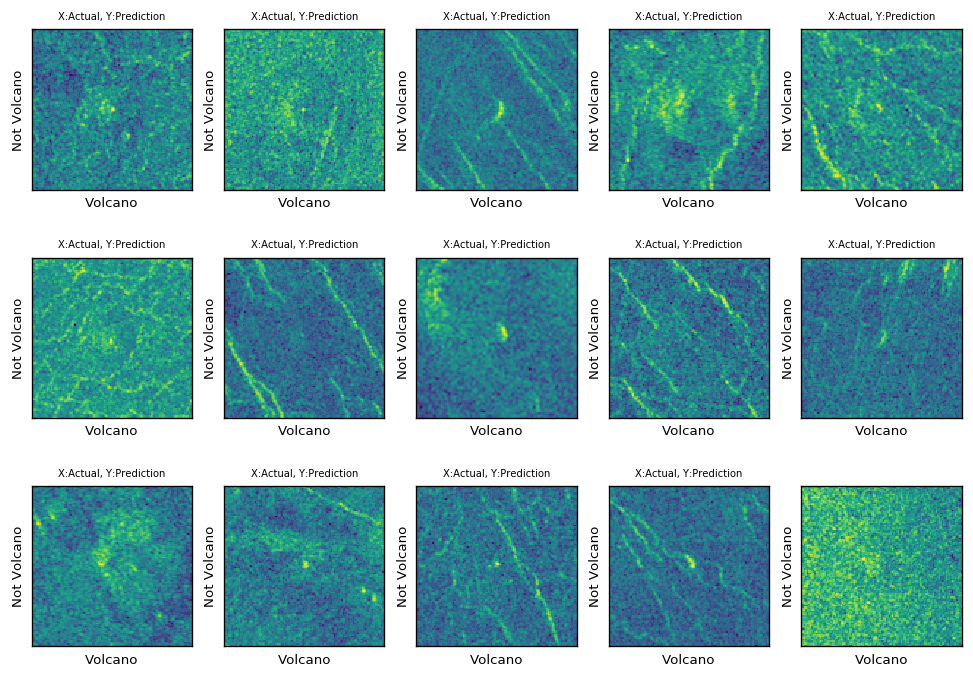

In [426]:
plt.style.use('default') 
plt.figure(figsize = (10, 7), dpi = 120)


for i,j in enumerate(comp_df[(comp_df["Actual"] != comp_df["Prediction"]) & (comp_df["Actual"] == 1)].index[0:15]):
    plt.title("X:Actual, Y:Prediction", fontsize = 6)
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(pd.DataFrame(X_train.T).iloc[j]).reshape(110, 110))
    plt.xlabel("Volcano" if pd.Series(y_train.T)[j] == 1 else "Not Volcano", fontsize = 8)
    plt.ylabel("Volcano" if pd.Series(d['Y_prediction_train'].T[:, 0])[j] == 1 else "Not Volcano", fontsize = 8)

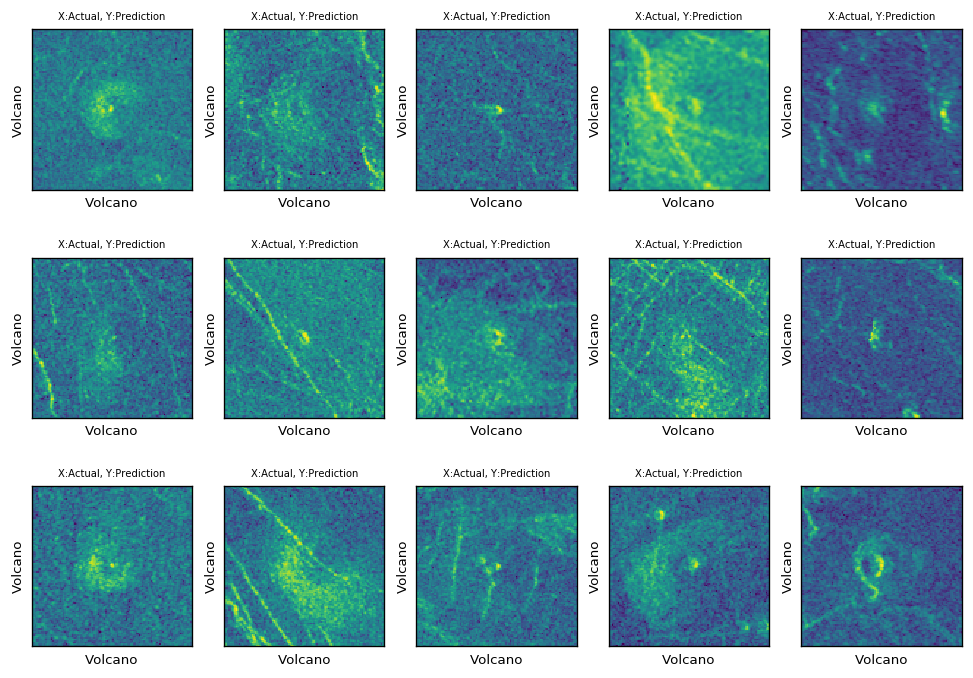

In [427]:
plt.style.use('default') 
plt.figure(figsize = (10, 7), dpi = 120)


for i,j in enumerate(comp_df[(comp_df["Actual"] == comp_df["Prediction"]) & (comp_df["Actual"] == 1)].index[0:15]):
    plt.title("X:Actual, Y:Prediction", fontsize = 6)
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(pd.DataFrame(X_train.T).iloc[j]).reshape(110, 110))
    plt.xlabel("Volcano" if pd.Series(y_train.T)[j] == 1 else "Not Volcano", fontsize = 8)
    plt.ylabel("Volcano" if pd.Series(d['Y_prediction_train'].T[:, 0])[j] == 1 else "Not Volcano", fontsize = 8)

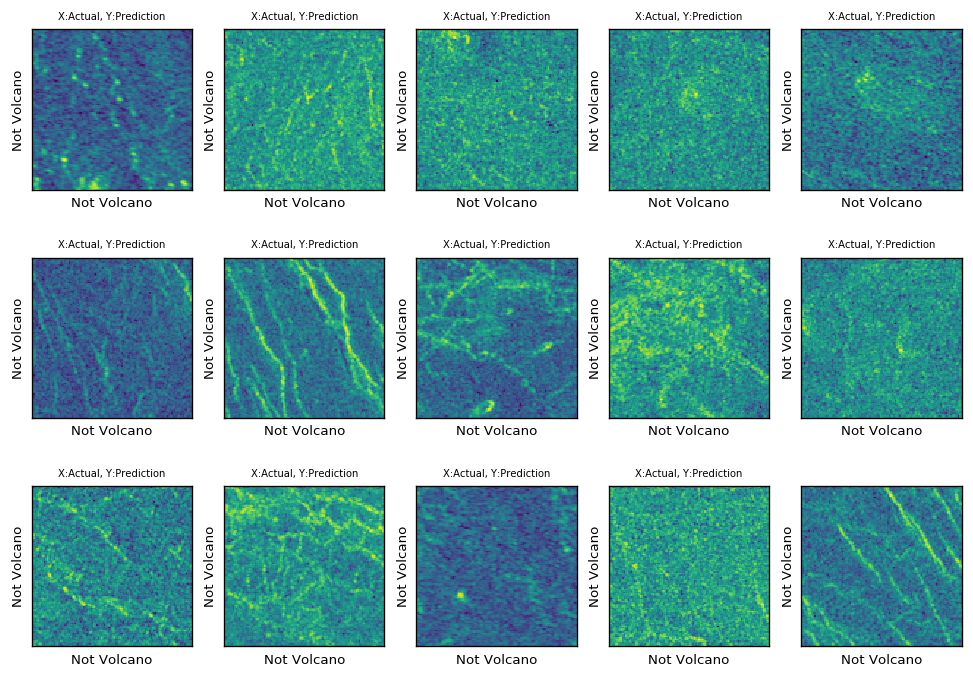

In [432]:
plt.style.use('default') 
plt.figure(figsize = (10, 7), dpi = 120)


for i,j in enumerate(comp_df[(comp_df["Actual"] == comp_df["Prediction"]) & (comp_df["Actual"] == 0)].index[0:15]):
    plt.title("X:Actual, Y:Prediction", fontsize = 6)
    subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(pd.DataFrame(X_train.T).iloc[j]).reshape(110, 110))
    plt.xlabel("Volcano" if pd.Series(y_train.T)[j] == 1 else "Not Volcano", fontsize = 8)
    plt.ylabel("Volcano" if pd.Series(d['Y_prediction_train'].T[:, 0])[j] == 1 else "Not Volcano", fontsize = 8)

In [430]:
comp_df[(comp_df["Actual"] != comp_df["Prediction"]) & (comp_df["Actual"] == 1)].index[0:15]

Int64Index([0, 14, 28, 32, 36, 38, 45, 53, 60, 78, 81, 92, 105, 108, 124], dtype='int64')

In [431]:
df.iloc[124]

0            115
1            100
2             95
3            110
4            108
           ...  
12097         98
12098         84
12099         80
Volcano        1
trn_tst    train
Name: 124, Length: 12102, dtype: object

---

### Logistic Regression with ReLu Activation function

---

One of the key advantages of building a machine learning algorithm from scratch is the opportunity to tweak and experiment with the algorithm.

Accordingly, I try to build a Logistic Regression model by replacing the Sigmoid activation with RelU activation unit.

However, the model ran into multiple warnings and errors as the Loss Function encountered undefined values such as `log 0`.

Therefore, the key take away here is, it is mathematically not feasible to build a logistic regression model with ReLU activation and Log Loss function.

Moreover, I tried to build logistic regression model with ReLU activation with Squared Error Loss function, but it's performance is not as good when compared to Sigmoid activation with Log Loss function.

Also, I spent some time doing research on using ReLU as classifier and the best loss function when using ReLU classifier. Interestingly, most of the articles suggest to use ReLU as activation function in the intermediate layers of Neural Network but not as a classifier at the output layer.

References: [Math Stack Exchange](https://stats.stackexchange.com/questions/166595/how-to-apply-cross-entropy-on-rectified-linear-units)

---

#### Debugger

In [152]:
learning_rate = 0.01
n, m = X_train.shape

w = np.zeros(shape = (n, 1))
b = 0

Z = np.dot(w.T, X_train)

A = sigmoid(Z)

cost = (-1.0/m) * np.sum(np.multiply(y_train, np.log(A)) + np.multiply((1-y_train), np.log(1 - A)))

dw = (1.0/m) * np.dot(X_train, (A - y_train).T)
db = (1.0/m) * np.sum(A - y_train)

w = w - (learning_rate * dw)
b = b - (learning_rate * db)

---

### Shallow Neural Network

In [ ]:
def sigmoid(z):
    A = 1.0/(1.0 + np.exp(-z))
    return A

In [45]:
def relu(z):
    A = np.maximum(0, z)
    assert(A.shape == z.shape)
    return A

In [26]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] 
    n_h = 1
    n_y = 1
    
    return (n_x, n_h, n_y)

In [39]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(42)
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [47]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [51]:
def compute_cost(A2, Y, parameters):
    
    m = len(Y)
    
    cost = (-1.0/m) * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1 - A2)))
    
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost, float))
    
    return cost

In [255]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = A2 - y_train
    dW2 = (1.0/float(m)) * np.dot(dZ2, np.transpose(A1))
    db2 = (1.0/float(m)) * np.sum(dZ2)
    dA1 = np.dot(np.transpose(W2), (A2 - y_train))
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0
    dW1 = (1.0/float(m)) * np.dot(dZ1, X_train.T)
    db1 = (1.0/float(m)) * np.sum(dZ1)
    
    assert (dZ1.shape == Z1.shape)
    assert (dZ2.shape == Z2.shape)
    assert (dW1.shape == W1.shape)
    assert (dW2.shape == W2.shape)
    #assert (db1.shape == b1.shape)
    #assert (db2.shape == b2.shape)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [67]:
def update_parameters(parameters, grads, learning_rate = 0.05):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1 = W1 - (learning_rate * dW1)
    W2 = W2 - (learning_rate * dW2)
    b1 = b1 - (learning_rate * db1)
    b2 = b2 - (learning_rate * db2)
    
    parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    return parameters

In [258]:
def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate = 0.05, print_cost = False):
    
    np.random.seed(42)
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [259]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters) 
    predictions = (A2 > 0.5)
    return predictions

In [286]:
parameters = nn_model(X_train, y_train, n_h = 3, num_iterations=1000, learning_rate = 0.5, print_cost = True)

Cost after iteration 0: 12.787217
Cost after iteration 100: 0.426294
Cost after iteration 200: 0.426287
Cost after iteration 300: 0.426287
Cost after iteration 400: 0.426287
Cost after iteration 500: 0.426287
Cost after iteration 600: 0.426287
Cost after iteration 700: 0.426287
Cost after iteration 800: 0.426287
Cost after iteration 900: 0.426287


In [287]:
y_train_pred = predict(parameters, X_train)

In [288]:
y_train_pred.shape

(1, 8325)

In [289]:
cm_evaluator(y_train, np.zeros(y_train.shape))

/Users/Manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


(0, 7059, 0, 1266, 0.8479279279279279, nan, 0.0)

In [290]:
TP, TN, FP, FN, accuracy, precision, recall = cm_evaluator(y_train, y_train_pred.T)

/Users/Manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [291]:
accuracy

0.8479279279279279

In [285]:
TP, TN, FP, FN

(0, 7059, 0, 1266)

In [280]:
sum(y_train_pred)

0

In [233]:
n_x = layer_sizes(X_train, y_train)[0]
n_y = layer_sizes(X_train, y_train)[2]
n_h = 1
learning_rate = 0.05

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h)
b2 = np.zeros((n_y, 1))

Z1 = np.dot(W1, X_train) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

m = len(y_train)
cost = (-1.0/m) * np.sum(np.multiply(y_train, np.log(A2)) + np.multiply((1-y_train), np.log(1 - A2)))
cost = float(np.squeeze(cost))
cost

dZ2 = A2 - y_train
dW2 = (1.0/float(m)) * np.dot(dZ2, np.transpose(A1))
db2 = (1.0/float(m)) * np.sum(dZ2)
dA1 = np.dot(np.transpose(W2), (A2 - y_train))
dZ1 = np.array(dA1, copy=True)
dZ1[Z1 <= 0] = 0
dW1 = (1.0/float(m)) * np.dot(dZ1, X_train.T)
db1 = (1.0/float(m)) * np.sum(dZ1)

W1 = W1 - (learning_rate * dW1)
W2 = W2 - (learning_rate * dW2)
b1 = b1 - (learning_rate * db1)
b2 = b2 - (learning_rate * db2)

### SKLearn

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
classifier = LogisticRegression(random_state = 11)

In [18]:
classifier.fit(X_train, y_train)

/Users/Manoj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=11, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = classifier.predict(X_val)

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
mae = mean_absolute_error(y_pred, y_val)

In [22]:
mae

0.07400379506641366

In [25]:
confusion_matrix(y_val, y_pred)

array([[427,  11],
       [ 28,  61]])

In [26]:
y_val.shape

(527,)

In [28]:
TP, TN, FP, FN, accuracy, precision, recall = cm_evaluator(y_val, y_pred)

In [29]:
accuracy

0.9259962049335864

In [30]:
TP, TN, FP, FN

(61, 427, 11, 28)

In [31]:
precision, recall

(0.8472222222222222, 0.6853932584269663)